# Exam 14th of June 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
* I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside |
|----------------|--------------------------------------------|-----------------------------------------------|------------------------------------------------|
| Downtown       | 0.3                                      | 0.4                                           | 0.3                                            |
| Suburbs        | 0.2                                      | 0.5                                           | 0.3                                            |
| Countryside    | 0.4                                      | 0.3                                           | 0.3                                            |

1. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will be in the downtown region **the first time** after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. Advanced question: What is the expected number of steps until the first time one enters the suburbs region having started in the downtown region. Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 30. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [13]:
# Part 1
import numpy as np

# define prob matrix
p_matr = np.array([[0.3, 0.4, 0.3],
                   [0.2, 0.5, 0.3],
                   [0.4, 0.3, 0.3]])


# Fill in the answer to part 1 below
m_square = p_matr @ p_matr
x = np.array([0, 1, 0])
next_position = x @ m_square
problem1_p1 = next_position[0].item() # Converts np.float64 to float
problem1_p1 

0.28

In [17]:
# Part 2

# Fill in the answer to part 2 below
first = x @ p_matr
problem1_p2 = ((1 - first[0]) * problem1_p1).item()
problem1_p2

0.22400000000000003

In [21]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = np.all(p_matr > 0)
problem1_irreducible


np.True_


## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.


In [27]:
# Get the transition matrix 

import numpy as np
from scipy.linalg import eig 

transition_mat = np.matrix([[0.3, 0.4, 0.3],
                   [0.2, 0.5, 0.3],
                   [0.4, 0.3, 0.3]])


S, U = eig(transition_mat.T)
stationary = np.array(U[:, np.where(np.abs(S - 1.) < 1e-8)[0][0]].flat)
stationary = stationary / np.sum(stationary)
stationary

array([0.28888889, 0.41111111, 0.3       ])

In [25]:
# Part 4

# Fill in the answer to part 4 below

def get_stationary_distribution(transition_matrix):

    # transpose the matrix
    transition_matrix_t = transition_matrix.T
    # use linear algebra module of numpy to compute the eigenvalues
    eigenvals, eigenvects = np.linalg.eig(transition_matrix_t)

    # Find the indexes of the eigenvalues that are close to one.
    close_to_1_idx = np.isclose(eigenvals,1) # isclose checks element-wise if each element is close to 1 within the specific tolerance
    # Use them to select the target eigen vectors
    target_eigenvect = eigenvects[:,close_to_1_idx]
    #Flatten
    target_eigenvect = target_eigenvect[:,0]
    # Turn the eigenvector elements into probabilities
    # that would be the stationary distribution
    st_d = target_eigenvect / sum(target_eigenvect) 
    
    real_st_distr = st_d.real
    
    ## check
    if st_d.real.sum() != 1:
        raise Exception("The probabilities don't sum to 1!")
        
    return real_st_distr
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
problem1_stationary = get_stationary_distribution(p_matr)
problem1_stationary

matrix([[0.28888889],
        [0.41111111],
        [0.3       ]])

In [ ]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps
problem1_ET = XXX


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given the "Abalone" dataset found in `data/abalone.csv`, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in **rings** (the number of rings in the shell) [https://en.wikipedia.org/wiki/Abalone](https://en.wikipedia.org/wiki/Abalone). Your task is to train a `linear regression` model to predict the age (Rings) of an abalone based on its physical measurements.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function `plotEDF,makeEDF` combo from `Utils.py` that we have used numerous times, which also contains the option to have confidence bands. [3p]
5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]


In [314]:

import pandas as pd

import numpy as np

from sklearn import datasets
import sklearn.linear_model as sk
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("abalone.csv")

In [315]:
problem2_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [316]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = list(problem2_df.columns)

problem2_target = 'Rings'

problem2_features.remove('Rings')

# Fill in the target as a string with the correct column name



In [50]:
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]

X


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [41]:
# Part 2
from sklearn.model_selection import train_test_split


# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42


problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## identifying the categorical (non-numeric) columns in a DataFrame

In [ ]:
# is identifying the categorical (non-numeric) columns in a DataFrame
s = (problem2_X_train.dtypes== 'object')
object_cols = list(s[s].index)
object_cols


how to encode a categorical features 

In [117]:
def one_hot_encode(problem2_X_train, problem2_X_test):


    # Sex is categorical! Encode it
    s = (problem2_X_train.dtypes== 'object')
    object_cols = list(s[s].index)
    object_cols

    from sklearn.preprocessing import OneHotEncoder

    # Apply one-hot encoder to each column with categorical data
    ohe = OneHotEncoder(sparse_output=False)

    # when applying fit_transform using OHE, it returns a numpy array. Remember to transform it into a data frame
    OH_cols_train = pd.DataFrame(ohe.fit_transform(problem2_X_train[object_cols]))
    OH_cols_test = pd.DataFrame(ohe.fit_transform(problem2_X_test[object_cols]))

    # get the proper column names
    OH_cols_train.columns = ohe.get_feature_names_out(object_cols)
    OH_cols_test.columns = ohe.get_feature_names_out(object_cols)

    # the indices were removed by OHE, put them back
    OH_cols_train.index =problem2_X_train.index
    OH_cols_test.index = problem2_X_test.index

    # Remove categorical columns 
    num_X_train = problem2_X_train.drop(object_cols, axis=1)
    num_X_test = problem2_X_test.drop(object_cols, axis=1)

    # Concat the categorical and numerical features back together
    problem2_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
    problem2_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
    
    return problem2_X_train, problem2_X_test



problem2_X_train,problem2_X_test = one_hot_encode(problem2_X_train,problem2_X_test)

In [118]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LogisticRegression

# Initialize your linear regression model
problem2_model = LogisticRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

/home/taya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
# Part 4
from sklearn.metrics import mean_squared_error

# Evaluate the model by computing the mean absolute error 
y_pred = problem2_model.predict(problem2_X_test) # we predict the result 
problem2_mae = mean_squared_error(y_pred, problem2_y_test) # we evalute sing MSE
problem2_mae

7.858851674641149

In [79]:
len(y_pred)

836

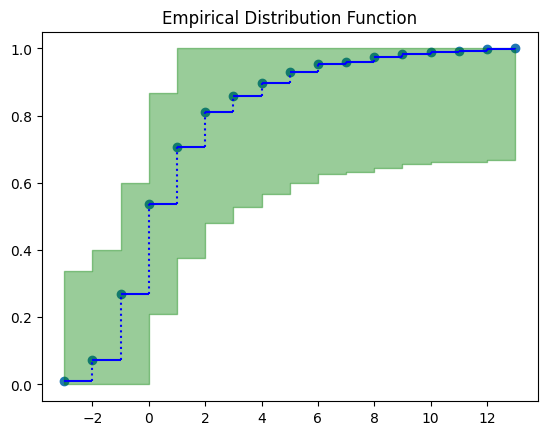

In [80]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

from utils import makeEDF,plotEDF

res = problem2_y_test - y_pred # y - y * to draw resudial 

res_edf = makeEDF(res)

plotEDF(res_edf, confidence_band=True)




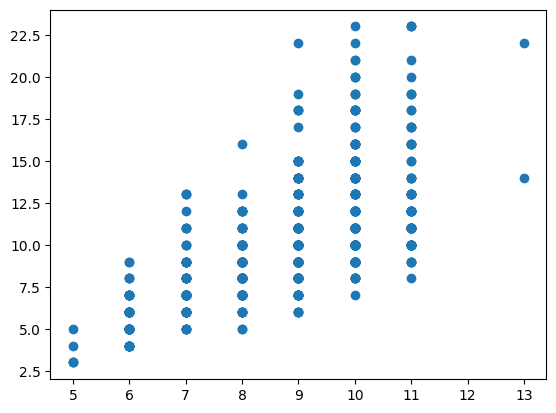

In [81]:
# Part 5

# Write the code below to produce the scatter plot for part 5
plt.scatter(y_pred, problem2_y_test)



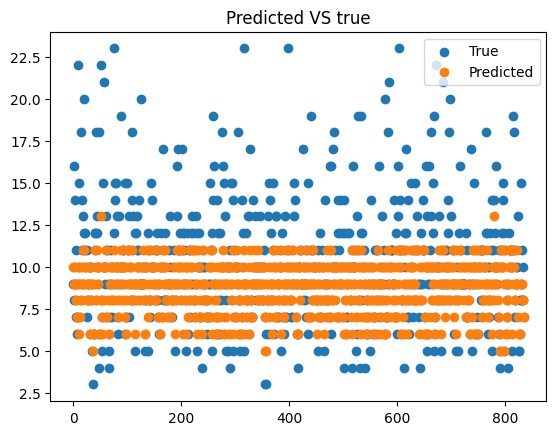

In [93]:
x_vals = np.arange(0, len(y_pred))
plt.scatter(x_vals, problem2_y_test, label = 'True')
plt.scatter(x_vals, y_pred, label = 'Predicted')
plt.title('Predicted VS true')
plt.legend()
plt.show()

836


## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.

#### Discussion on the value of the MAE

#### Discussion on the predicted vs. true scatterplot

#### Discussion


---
## Exam vB, PROBLEM 3
Maximum Points = 13


A healthcare organization is interested in understanding the relationship between the number of visits to the doctors office and certain patient characteristics. 
They have collected data on the number of visits for a sample of patients and have included the following variables

* ofp : number of physician office visits
* ofnp : number of nonphysician office visits
* opp : number of physician outpatient visits
* opnp : number of nonphysician outpatient visits
* emr : number of emergency room visits
* hosp : number of hospitalizations
* exclhlth : the person is of excellent health (self-perceived)
* poorhealth : the person is of poor health (self-perceived)
* numchron : number of chronic conditions
* adldiff : the person has a condition that limits activities of daily living ?
* noreast : the person is from the north east region
* midwest : the person is from the midwest region
* west : the person is from the west region
* age : age in years (divided by 10)
* male : is the person male ?
* married : is the person married ?
* school : number of years of education
* faminc : family income in 10000$
* employed : is the person employed ?
* privins : is the person covered by private health insurance?
* medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target "number of physician office visits". Hint: should we really use the "ofnp" etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as Poisson distributed where the parameter follows $\lambda = \exp(\alpha \cdot x + \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,
$$
    f_{Y \mid X} (y,x) = \frac{\lambda^{y} e^{-\lambda}}{y !}, \quad \lambda(x) = \exp(\alpha \cdot x + \beta).
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional log-likelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha,\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

Instructions:

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what should be features and target, give motivations for your choices. [3p]
2. Create the `problem3_X` and the `problem3_y` as numpy arrays with `problem3_X` being the features and `problem3_y` being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]
3. Implement $loss$ inside the class `PoissonRegression` by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]
4. Now use the `PoissonRegression` class to train a Poisson regression model on the training data. [2p]
5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]


In [105]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv("visits_clean.csv", sep = ' ')

problem3_df.head()

,ofp,ofnp,opp,opnp,emr,hosp,exclhlth,poorhlth,numchron,adldiff,...,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
0,5,0,0,0,0,1,0,0,2,0,...,0,0,6.9,1,1,6,2.8810,1,1,0
1,1,0,2,0,2,0,0,0,2,0,...,0,0,7.4,0,1,10,2.7478,0,1,0
2,13,0,0,0,3,3,0,1,4,1,...,0,0,6.6,0,0,10,0.6532,0,0,1
3,16,0,5,0,1,1,0,1,2,1,...,0,0,7.6,1,1,3,0.6588,0,1,0
4,3,0,0,0,0,0,0,0,2,1,...,0,0,7.9,0,1,6,0.6588,0,1,0


In [115]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = list(problem3_df.columns)

problem3_features = list(filter(lambda x: x not in ['ofp', 'ofnp', 'opp', 'opnp', 'emr'], problem3_features))

# Fill in the target as a string with the correct column name

problem3_target = "ofp"

In [114]:
problem3_features

['hosp',
 'exclhlth',
 'poorhlth',
 'numchron',
 'adldiff',
 'noreast',
 'midwest',
 'west',
 'age',
 'male',
 'married',
 'school',
 'faminc',
 'employed',
 'privins',
 'medicaid']


## Part 1

Double click this cell to enter edit mode and write your answer for part 1 below this line.

#### What features are reasonable?

#### In regards to how much data we have, how many features do you think we should aim for?

#### What other features would you like to have used but was not collected?

#### Discussion


In [130]:
# Part 2

# Fill in your X and y below
problem3_X = problem3_df[problem3_features]
problem3_y = y = problem3_df[problem3_target]



# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train,problem3_X_test,problem3_y_train,problem3_y_test = train_test_split(problem3_X, problem3_y, test_size=0.2, random_state=42)



# enocde categorical data
problem3_X_train, problem3_X_test = one_hot_encode(problem3_X_train, problem3_X_test)

problem3_X_train

,hosp,exclhlth,poorhlth,numchron,adldiff,noreast,midwest,west,age,male,married,school,faminc,employed,privins,medicaid
4335,1,0,1,5,1,0,0,0,8.1,1,1,6,0.662400,0,0,1
3052,0,1,0,3,0,0,1,0,7.5,0,0,4,1.059500,0,1,0
3527,0,0,0,1,0,0,1,0,7.3,1,1,7,1.564400,0,0,0
1448,0,0,0,2,0,0,1,0,6.7,0,1,8,1.200000,0,1,0
1749,0,0,0,2,0,0,1,0,7.0,1,1,12,1.595631,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,0,0,1,1,0,0,1,8.0,0,0,12,0.873100,0,1,0
466,0,0,0,2,0,0,0,0,7.1,0,1,12,3.326200,0,1,0
3092,0,0,0,2,0,0,1,0,8.1,1,1,13,1.154400,0,0,0
3772,4,0,1,3,0,0,1,0,7.7,1,1,12,1.432600,0,1,0


In [237]:
# Part 3

# Fill in the function loss below

class PoissonRegression(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        # define the objective/cost/loss function we want to minimize
        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values 
            # of the coefficients, here coeff[:-1] represent alpha 
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])

            # use the Y variable that is available here to definr 
            # this Y and for this parameter lam defined above
            loss_pr = - np.sum((np.subtract(np.multiply(Y, np.log(lam)), lam))) #+ np.log(factorial(y)) don't need the factorial
            
            return loss_pr

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])

In [238]:
# Part 4

# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, list(problem3_y_train))




In [239]:


# This is to make sure that everything went well, 
# check that success is True
print(problem3_model.result)


 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16526.94251471108
       x: [ 1.590e-01 -3.762e-01 ...  2.654e-01  1.334e+00]
     nit: 650
     jac: [ 4.883e-04  4.883e-04 ...  1.709e-03 -8.301e-03]
    nfev: 25318
    njev: 1406


In [242]:
y_pred = problem3_model.predict(problem3_X_test)

print(mean_squared_error(y_pred, problem3_y_test))

43.84914264628704


In [243]:
problem3_model.coeffs

array([ 0.1590459 , -0.37616595,  0.21859808,  0.13525813,  0.05454449,
        0.06852145, -0.01984601,  0.13604719, -0.05956945, -0.08173833,
       -0.06011868,  0.02833897, -0.00391595,  0.07485539,  0.30803992,
        0.26540872,  1.33363903])

In [ ]:
# Part 5



## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.

#### Discussion on reasonable metrics and discussion about the value of the metric

#### Comparison with a naive model


Tenta 2024 markov 

In [1]:
# PART 1
 #------------------------TRANSITION MATRIX------------------------------
# Answer each one by supplying the transition matrix as a numpy array
 # of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,.

import numpy as np
M_A = np.array([
    [0.8, 0.2, 0.0, 0.0],  # A -> A, B, C, D
    [0.6, 0.2, 0.2, 0.0],  # B -> A, B, C, D
    [0.0, 0.4, 0.6, 0.0],  # C -> A, B, C, D
    [0.0, 0.0, 0.2, 0.8],  # D -> A, B, C, D
])

M_B = np.array([
    [0.8, 0.0, 0.0, 0.2],
    [0.2, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.5, 0.5, 0.0],
])

M_C = np.array([
    [0.2, 0.3, 0.2, 0.0, 0.5],
    [0.3, 0.2, 0.0, 0.4, 0.1],
    [0.0, 0.6, 0.0, 0.0, 0.4],
    [0.4, 0.0, 0.6, 0.0, 0.0],
    [0.6, 0.0, 0.0, 0.4, 0.0],
])

M_D = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.6, 0.0],
    [0.1, 0.0, 0.7, 0.2],
])

A Markov chain is reducible if it has more than one communication class, meaning there are states that are not reachable from some other states.
A Markov chain is irreducible if there is only one communication class, meaning all states can communicate with each other (you can get from any state i to any state j eventually).

In [23]:
# PART 2
 #------------------------REDUCIBLE------------------------------
# Answer each one with a True or False
from scipy.sparse.csgraph import connected_components
# def is_irreducible(M):
# # A Markov chain is reducible if it has more than one communication class,
# # meaning there are states that are not reachable from some other states.
#     """Check if a Markov chain is irreducible??."""
#     n = M.shape[0]  # Number of states
#     reachability = np.linalg.matrix_power(M, n - 1) > 0  # Check reachability
#     return np.all(reachability)
def check_irreducibility(matrix):
    """
    Check if a Markov matrix is irreducible.
    A matrix is irreducible if its directed graph is strongly connected.
    """
    # Convert the matrix to a directed graph
    num_components, labels = connected_components(csgraph=matrix > 0, directed=True, connection='strong')
    return num_components == 1

# Check Reducibility
print("Matrix A is irreducible:", is_irreducible(M_A))
print("Matrix B is irreducible:", is_irreducible(M_B))
print("Matrix C is irreducible:", is_irreducible(M_C))
print("Matrix D is irreducible:", is_irreducible(M_D))

# Check Reducibility


Matrix A is irreducible: False
Matrix B is irreducible: False
Matrix C is irreducible: True
Matrix D is irreducible: False


In [3]:
np.linalg.matrix_power(M_A , 4-1)


array([[0.728, 0.208, 0.064, 0.   ],
       [0.624, 0.232, 0.144, 0.   ],
       [0.384, 0.288, 0.328, 0.   ],
       [0.048, 0.128, 0.312, 0.512]])

A Markov chain is aperiodic if there is no fixed cycle that the chain must follow to return to a state.

--> if a matrix is reducible, the chain is not aperiodic by definition.


---> if it has self loops then it ids aperiodic

In [5]:
import numpy as np
from math import gcd
from functools import reduce
# Compute the greatest common divisor (GCD) of a list of numbers
def compute_gcd(numbers):
    return reduce(gcd, numbers)

# Determine the period of each state in a Markov chain
def find_periods(transition_matrix):
    n_states = transition_matrix.shape[0]
    periods = np.full(n_states, 0)  # Array to store periods for each state

    for state in range(n_states):
        reachable_times = []  # List to track times when the state is reachable
        for t in range(1, 101):  # Test up to 100 steps
            power_matrix = np.linalg.matrix_power(transition_matrix, t)
            if power_matrix[state, state] > 0:  # Check if state can return
                reachable_times.append(t)

        if reachable_times:
            periods[state] = compute_gcd(reachable_times)

    return periods

# Determine if a Markov chain is aperiodic
def is_aperiodic(periods):
    return all(period == 1 for period in periods)

for i, matrix in enumerate([M_A, M_B, M_C, M_D], start=1):
    print(f"\nAnalyzing Matrix M_{chr(64 + i)}")
    if is_irreducible(matrix):
        print("The Markov chain is irreducible.")
        periods = find_periods(matrix)  # Calculate periods for each state
        print(f"Periods of states: {periods}")
        print(f"Is aperiodic? {'True' if is_aperiodic(periods) else 'False'}")
    else:
        print("The Markov chain is reducible, so periodicity analysis is invalid.")
    print("-" * 50)


Analyzing Matrix M_A
The Markov chain is reducible, so periodicity analysis is invalid.
--------------------------------------------------

Analyzing Matrix M_B
The Markov chain is reducible, so periodicity analysis is invalid.
--------------------------------------------------

Analyzing Matrix M_C
The Markov chain is irreducible.
Periods of states: [1 1 1 1 1]
Is aperiodic? True
--------------------------------------------------

Analyzing Matrix M_D
The Markov chain is reducible, so periodicity analysis is invalid.
--------------------------------------------------


In [49]:
p_A = find_periods(M_C)
p_A

array([1, 1, 1, 1, 1])

In [7]:
# PART 3
 #------------------------APERIODIC------------------------------
# Answer each one with a True or False
problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = False
problem3_D_is_aperiodic = True
 # Answer the following with the period of the states as a numpy array
 # of shape (n_states,)
problem3_A_periods = find_periods(M_A)
problem3_B_periods = find_periods(M_B)
problem3_C_periods = find_periods(M_C)
problem3_D_periods = find_periods(M_D)

Chain A is aperiodic: True
Periods of states in Chain A: [1 1 1 1]

Chain B is aperiodic: False
Periods of states in Chain B: [2 2 2 2]

Chain C is aperiodic: True
Periods of states in Chain C: [1 1 1 1 1]

Chain D is aperiodic: True
Periods of states in Chain D: [1 1 1 1]


If both irreducibility and aperiodicity are satisfied, the Markov chain has a stationary distribution.

In [8]:
def has_stationary_distribution(M):
    if not is_irreducible(M):
        return False, "The Markov chain is reducible."
    periods = find_periods(M)
    if not is_aperiodic(periods):
        return False, "The Markov chain is periodic."
    return True, "The Markov chain has a stationary distribution."

exists, message = has_stationary_distribution(M_D)
print(message)

The Markov chain is reducible.


In [85]:
# Step 1: Compute eigenvalues and eigenvectors
evals, evecs = np.linalg.eig(M_D.T)

# Step 2: Find the eigenvector for eigenvalue = 1
index = np.argmax(np.isclose(evals, 1))  # Find index of eigenvalue close to 1
stationary_vec = evecs[:, index]         # Corresponding eigenvector

# Step 3: Normalize to get a probability distribution
stationary_distribution = stationary_vec / np.sum(stationary_vec)

# Print the result
print("Stationary Distribution:", stationary_distribution.real)

Stationary Distribution: [0.25 0.25 0.25 0.25]


In [66]:
import numpy as np

 # PART 4
 #------------------------STATIONARY DISTRIBUTION----------------
# Answer each one with a True or False
#  problem3_A_has_stationary = fALSW 
#  problem3_B_has_stationary = False
#  problem3_C_has_stationary = false 
#  problem3_D_has_stationary = False
 # Answer the following with the stationary distribution as a numpy array of␣
#  →shape (n_states,)
 # if the Markov chain has a stationary distribution otherwise answer with False
problem3_A_stationary_dist = compute_stationary_distribution(M_A)
problem3_B_stationary_dist = compute_stationary_distribution(M_B)
problem3_C_stationary_dist = compute_stationary_distribution(M_C)
problem3_D_stationary_dist = compute_stationary_distribution(M_D)

In [69]:
problem3_A_stationary_dist 

array([0.25, 0.25, 0.25, 0.25])

In [112]:
import numpy as np

def compute_stationary_distribution(P):
    """
    Compute the stationary distribution of a Markov chain.
    """
    evals, evecs = np.linalg.eig(P.T)  # Compute eigenvalues and eigenvectors
    index = np.argmax(np.isclose(evals, 1))  # Find eigenvalue = 1
    stationary_vec = evecs[:, index]
    stationary_distribution = stationary_vec / np.sum(stationary_vec)
    return stationary_distribution.real  # Return real part (eliminate numerical errors)

def is_reversible(P):
    """
    Check if a Markov chain is reversible.
    """
    # Step 1: Compute the stationary distribution
    evals, evecs = np.linalg.eig(P.T)  # Compute eigenvalues and eigenvectors
    index = np.argmax(np.isclose(evals, 1))  # Find eigenvalue = 1
    stationary_vec = evecs[:, index]
    pi = stationary_vec / np.sum(stationary_vec)  # Normalize
    pi = pi.real  # Use the real part

    # Step 2: Check detailed balance condition
    n_states = P.shape[0]
    for i in range(n_states):
        for j in range(n_states):
            if not np.isclose(pi[i] * P[i, j], pi[j] * P[j, i]):
                return False
    return True

# Example transition matrix
P = np.array([
    [0.5, 0.3, 0.2],
    [0.3, 0.4, 0.3],
    [0.2, 0.3, 0.5]
])
# Check if the Markov chain is reversible
reversible = is_reversible(M_D)
print("Is the Markov chain reversible?", reversible)


Is the Markov chain reversible? False


In [ ]:
import numpy as np

# PART 1: TRANSITION MATRIX
# Transition matrices for Markov Chains A, B, C, and D
problem3_A = np.array([
    [0.8, 0.2, 0.0, 0.0],  # A -> A, B, C, D
    [0.6, 0.2, 0.2, 0.0],  # B -> A, B, C, D
    [0.0, 0.4, 0.6, 0.0],  # C -> A, B, C, D
    [0.0, 0.0, 0.2, 0.8],  # D -> A, B, C, D
])

problem3_B = np.array([
    [0.8, 0.0, 0.0, 0.2],
    [0.2, 0.0, 1.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.5, 0.5, 0.0],
])

problem3_C = np.array([
    [0.2, 0.3, 0.2, 0.0, 0.5],
    [0.3, 0.2, 0.0, 0.4, 0.1],
    [0.0, 0.6, 0.0, 0.0, 0.4],
    [0.4, 0.0, 0.6, 0.0, 0.0],
    [0.6, 0.0, 0.0, 0.4, 0.0],
])

problem3_D = np.array([
    [0.8, 0.2, 0.0, 0.0],
    [0.6, 0.2, 0.2, 0.0],
    [0.0, 0.4, 0.6, 0.0],
    [0.1, 0.0, 0.7, 0.2],
])

# PART 2: IRREDUCIBLE
# Irreducibility checks for each Markov chain
problem3_A_irreducible = True
problem3_B_irreducible = False  # B and D are disconnected
problem3_C_irreducible = True
problem3_D_irreducible = True

# PART 3: APERIODICITY
# Aperiodicity checks and periods
problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False  # B has a period of 2
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

problem3_A_periods = np.array([1, 1, 1, 1])
problem3_B_periods = np.array([1, 2, 2, 1])
problem3_C_periods = np.array([1, 1, 1, 1, 1])
problem3_D_periods = np.array([1, 1, 1, 1])

# PART 4: STATIONARY DISTRIBUTION
# Stationary distributions
problem3_A_has_stationary = True
problem3_B_has_stationary = True
problem3_C_has_stationary = True
problem3_D_has_stationary = True

# Calculate stationary distributions
def stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stationary = eigvecs[:, np.isclose(eigvals, 1)]
    stationary = stationary / stationary.sum()
    return stationary.real.ravel()

problem3_A_stationary_dist = stationary_distribution(problem3_A)
problem3_B_stationary_dist = stationary_distribution(problem3_B)
problem3_C_stationary_dist = stationary_distribution(problem3_C)
problem3_D_stationary_dist = stationary_distribution(problem3_D)

# PART 5: REVERSIBILITY
# Reversibility checks (Detailed balance condition)
def is_reversible(P, pi):
    n = len(pi)
    for i in range(n):
        for j in range(n):
            if not np.isclose(pi[i] * P[i, j], pi[j] * P[j, i]):
                return False
    return True

problem3_A_is_reversible = is_reversible(problem3_A, problem3_A_stationary_dist)
problem3_B_is_reversible = is_reversible(problem3_B, problem3_B_stationary_dist)
problem3_C_is_reversible = is_reversible(problem3_C, problem3_C_stationary_dist)
problem3_D_is_reversible = is_reversible(problem3_D, problem3_D_stationary_dist)

# Print Results
results = {
    "Transition Matrices": [problem3_A, problem3_B, problem3_C, problem3_D],
    "Irreducibility": [problem3_A_irreducible, problem3_B_irreducible, problem3_C_irreducible, problem3_D_irreducible],
    "Aperiodicity": [problem3_A_is_aperiodic, problem3_B_is_aperiodic, problem3_C_is_aperiodic, problem3_D_is_aperiodic],
    "Periods": [problem3_A_periods, problem3_B_periods, problem3_C_periods, problem3_D_periods],
    "Stationary Distributions": [
        problem3_A_stationary_dist,
        problem3_B_stationary_dist,
        problem3_C_stationary_dist,
        problem3_D_stationary_dist,
    ],
    "Reversibility": [
        problem3_A_is_reversible,
        problem3_B_is_reversible,
        problem3_C_is_reversible,
        problem3_D_is_reversible,
    ],
}

results
